In [1]:
# Auto reload, no need to restart notebook everytime an imported module changes.
%load_ext autoreload
%autoreload 2

import os

import numpy as np
import pandas as pd
import seaborn as sns

from plotting import plot_scores, plot_aurocs, plot_quantized_aurocs, plot_pca

sns.set()

import warnings

warnings.filterwarnings("ignore")

In [2]:
# path to up-to-date results of various GNN models
results_files = {
    'default_gcn': '../agg_results/graph_gcn_results.json',
    'default_gat': '../agg_results/gat_graph_results.json',
    'default_gin': '../agg_results/graph_gin_results.json',
    'default_cheb': '../agg_results/cheb_graph_results.json',
    'default_gatv2': '../agg_results/default_gatv2.json',
    'default_resgatedgcn': '../agg_results/default_resgatedgcn.json',
}

save_dirs = {
    'default_gcn': 'outputs/graph/gcn_default',
    'default_gat': 'outputs/graph/gat_default',
    'default_gin': 'outputs/graph/gin_default',
    'default_cheb': 'outputs/graph/cheb_default',
    'default_gatv2': 'outputs/graph/gatv2_default',
    'default_resgatedgcn': 'outputs/graph/default_resgatedgcn',
}

name_dict = {
    'PyG-TUDataset_DD': 'D&D',
    'PyG-TUDataset_ENZYMES': 'ENZYMES',
    'PyG-TUDataset_PROTEINS': 'PROTEINS',
    'PyG-TUDataset_NCI1': 'NCI1',
    'PyG-TUDataset_IMDB-BINARY': 'IMDB-BINARY',
    'PyG-TUDataset_REDDIT-BINARY': 'REDDIT-BINARY',
    'PyG-TUDataset_REDDIT-MULTI-5K': 'REDDIT-MULTI-5K',
    'PyG-TUDataset_COLLAB': 'COLLAB',
    'PyG-TUDataset_MUTAG': 'MUTAG',
    'PyG-TUDataset_NCI109': 'NCI109',
    'PyG-TUDataset_Synthie': 'Synthie',
    'PyG-TUDataset_SYNTHETICnew': 'SYNTHETICnew',
    'PyG-GNNBenchmarkDataset_MNIST': 'MNIST',
    'PyG-GNNBenchmarkDataset_CIFAR10': 'CIFAR10',
    'PyG-GNNBenchmarkDataset_PATTERN': 'PATTERN',
    'PyG-GNNBenchmarkDataset_CLUSTER': 'CLUSTER',
    'PyG-MalNetTiny_LocalDegreeProfile': 'MalNetTiny',
    'nx_smallworld': 'Small-World',
    'nx_scalefree': 'Scale-Free',
    'OGB_ogbg-molhiv': 'ogbg-molhiv',
    'OGB_ogbg-moltox21': 'ogbg-moltox21',
    }

pert_dict = {
    'none': '-',
    'Fragmented-k1': 'Frag-k1',
    'Fragmented-k2': 'Frag-k2',
    'Fragmented-k3': 'Frag-k3',
    'FullyConnected': 'FullyConn',
    'NoEdges': 'NoEdges',
    'NoFeatures': 'NoNodeFtrs',
    'NodeDegree': 'NodeDeg',
    'FiedlerFragmentation': 'FiedlerFrag',
    'BandpassFiltering-lo': 'LowPass',
    'BandpassFiltering-mid': 'MidPass',
    'BandpassFiltering-hi': 'HighPass',
}

ind_cat_dict = {
    'D&D': 'I-2',
    'ENZYMES': 'I-1',
    'PROTEINS': 'I-2',
    'NCI1': 'I-3',
    'IMDB-BINARY': 'I-3',
    'REDDIT-BINARY': 'I-3',
    'REDDIT-MULTI-5K': 'I-3',
    'COLLAB': 'I-3',
    'MUTAG': 'I-2',
    'NCI109': 'I-3',
    'Synthie': 'I-3',
    'SYNTHETICnew': 'I-3',
    'MNIST': 'I-1',
    'CIFAR10': 'I-1',
    'PATTERN': 'I-3',
    'CLUSTER': 'I-3',
    'MalNetTiny': 'I-2',
    'Small-World': 'I-2',
    'Scale-Free': 'I-2',
    'ogbg-molhiv': 'I-2',
    'ogbg-moltox21': 'I-2'
    }
ind_cat_dict = {k: ind_cat_dict[k] for k in sorted(ind_cat_dict)}

In [3]:
conf = 'default_gcn'
results_file = results_files[conf]
save_dir = save_dirs[conf]

In [4]:
df = pd.read_json(results_file)
df['Dataset'] = df['Dataset'].apply(name_dict.get)
df['Perturbation'] = df['Perturbation'].apply(pert_dict.get)
df = df[df['Dataset'].notna()]
df

,Dataset,Perturbation,Split,score-epoch,score-time_iter,score-accuracy,score-precision,score-recall,score-f1,score-auc,score-macro-f1,score-ap
0,D&D,NodeDeg,train,46,0.02080,0.85308,0.85709,0.76086,0.80346,0.89760,NaN,NaN
1,D&D,NodeDeg,val,46,0.01156,0.70491,0.73301,0.46445,0.54988,0.76665,NaN,NaN
2,D&D,NodeDeg,test,46,0.01124,0.67257,0.69423,0.41441,0.49112,0.72725,NaN,NaN
3,MNIST,NodeDeg,train,242,0.01674,0.33697,NaN,NaN,NaN,0.76243,0.29604,NaN
4,MNIST,NodeDeg,val,242,0.00780,0.22088,NaN,NaN,NaN,0.65495,0.19326,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
751,NCI109,NoEdges,val,142,0.00787,0.61594,0.61364,0.65074,0.62817,0.66343,NaN,NaN
752,NCI109,NoEdges,test,142,0.00775,0.60456,0.60335,0.63438,0.61570,0.64520,NaN,NaN
753,ogbg-molhiv,NoEdges,train,34,0.01520,0.96854,0.74526,0.23823,0.35647,0.85025,NaN,NaN
754,ogbg-molhiv,NoEdges,val,34,0.00722,0.98019,0.51704,0.13457,0.20794,0.78081,NaN,NaN


In [5]:
#######################
split_type = 'test'
score_type = 'auc'
#######################

score_name = f'score-{score_type}'
df = df[df['Split'] == split_type]
df = df[df[score_name].notna()]

datasets = sorted(df['Dataset'].unique())
# perturbations = sorted(df['Perturbation'].unique())
perturbations = [
    '-',
    'NoNodeFtrs',
    'NodeDeg',
    'LowPass',
    'MidPass',
    'HighPass',
    'NoEdges',
    'FullyConn',
    'Frag-k1',
    'Frag-k2',
    'Frag-k3',
    'FiedlerFrag',
]

In [6]:
score_mat = np.zeros((len(datasets), len(perturbations)))
score_mat[:] = np.nan

for dataset, group in df.groupby('Dataset'):
    dataset_idx = datasets.index(dataset)

    for perturbation, score in group[['Perturbation', score_name]].values:
        perturbation_idx = perturbations.index(perturbation)
        score_mat[dataset_idx, perturbation_idx] = score * 100

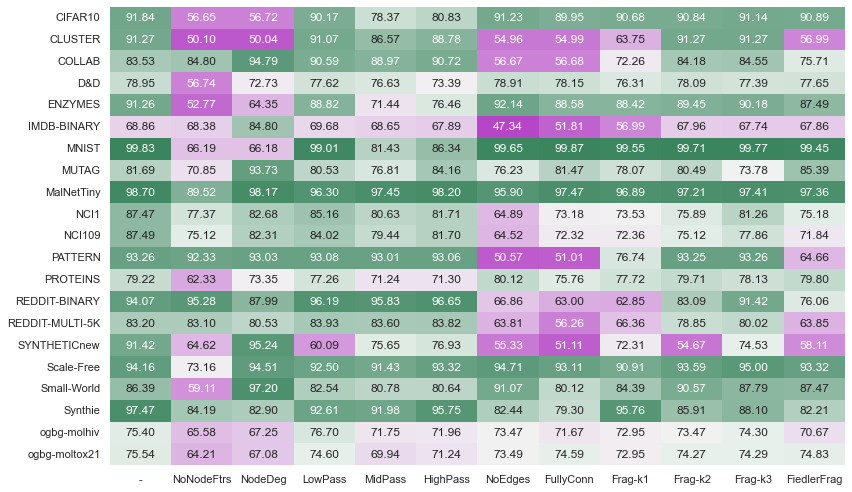

In [7]:
plot_scores(score_mat, datasets, perturbations, figsize=(12, 7), save_dir=save_dir)

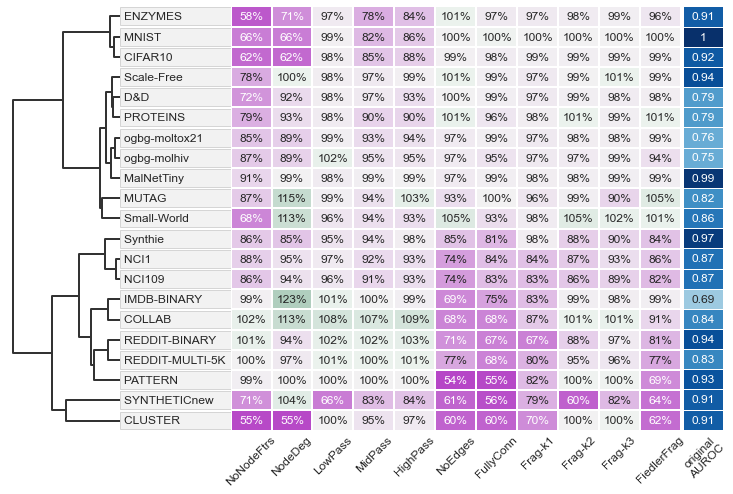

In [8]:
plot_aurocs(score_mat, datasets, perturbations, figsize=(16, 8), save_dir=save_dir,
            score_col_pos=[0.502, 0.0578, 0.035, 0.735],  dendrogram_pos_param=(0.096, 1), y_tick_left_shift=0.23)

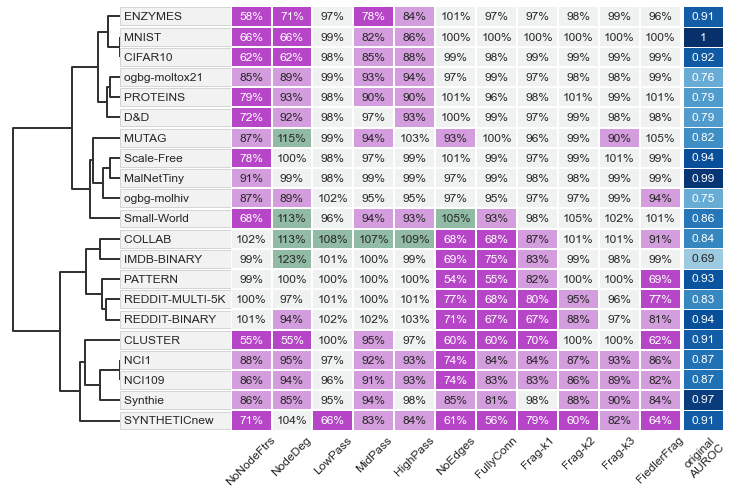

In [9]:
plot_quantized_aurocs(score_mat, datasets, perturbations, figsize=(16, 8), save_dir=save_dir,
            score_col_pos=[0.502, 0.0578, 0.035, 0.735],  dendrogram_pos_param=(0.096, 1), y_tick_left_shift=0.23)

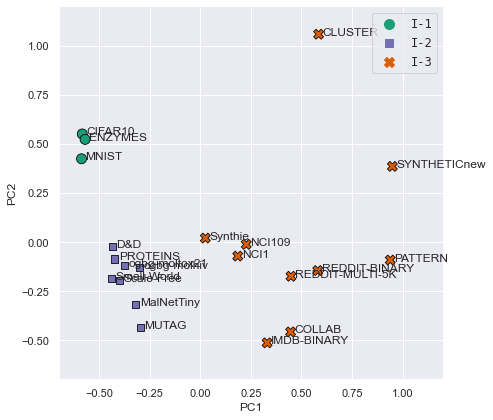

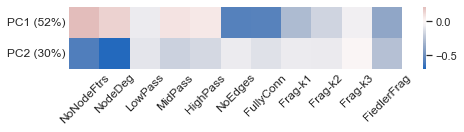

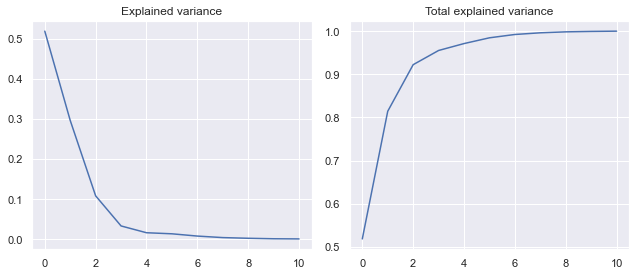

[0.51837446 0.81430504 0.92226637 0.95519607 0.97121484 0.98456807
 0.99227167 0.99617198 0.99838035 0.99938235 1.        ]


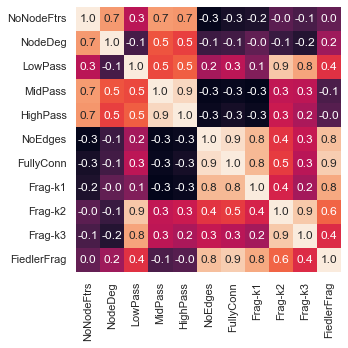

In [10]:
color_labels = list(ind_cat_dict.values())
plot_pca(score_mat, datasets, perturbations, figsize=(7, 6), save_dir=save_dir,
         pca_xlimit=[-.7, 1.2], pca_ylimit=[-.7, 1.2],
         hue=color_labels,
         style=color_labels,
         palette=sns.color_palette("Dark2", 3),
         edgecolor='black',
         s=100)